# PointGraph

This notebook presents the basic concepts behind Menpo's `PointGraph` class and subclasses. 

**`PointGraph` is basically `Graph`s with geometry (`PointCloud`)**. This means that apart from the edge connections between vertices, a `PointGraph` also defines spatial location coordinates for each vertex. The `PointGraph` subclasses are:
* `PointUndirectedGraph`: graph with undirected edge connections
* `PointDirectedGraph`: graph with directed edge connections
* `PointTree`: directed graph in which any two vertices are connected with exactly one path

For a tutorial on the basics of the `Graph` class, pease refer to the `Graph` notebook.

This presentation contains the following:

1. PointUndirectedGraph
2. PointDirectedGraph
3. PointTree
4. Functionality
5. Facial PointGraph
6. Widget

First, let's make all the necessary imports:

In [1]:
%matplotlib inline
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

from menpo.shape import PointUndirectedGraph, PointDirectedGraph, PointTree

## 1. PointUndirectedGraph

The following undirected graph:

```
        |---0---|
        |       |
        |       |
        1-------2
        |       |
        |       |
        3-------4
        |
        |
        5
```
can be defined as:


In [2]:
points = np.array([[10, 30], [0, 20], [20, 20], [0, 10], [20, 10], [0, 0]])
adj_undirected = np.array([[0, 1, 1, 0, 0, 0],
                           [1, 0, 1, 1, 0, 0], 
                           [1, 1, 0, 0, 1, 0],
                           [0, 1, 0, 0, 1, 1],
                           [0, 0, 1, 1, 0, 0],
                           [0, 0, 0, 1, 0, 0]])
undirected_graph = PointUndirectedGraph(points, adj_undirected)

and printed and visualized as:

Undirected graph of 6 vertices and 7 edges.


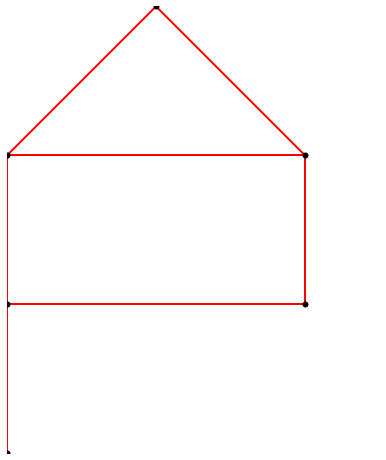

In [3]:
print undirected_graph
undirected_graph.view(image_view=False, render_axes=False, line_width=2);

## 2. PointDirectedGraph

Similarly, the following directed graph with isolated vertices:
```
        |-->0<--|
        |       |
        |       |
        1<----->2
        |       |
        v       v
        3------>4
        |
        v
        5       6
```
can be defined as:

In [4]:
points = np.array([[10, 30], [0, 20], [20, 20], [0, 10], [20, 10], [0, 0], [20, 0]])
adj_directed = np.array([[0, 0, 0, 0, 0, 0, 0],
                         [1, 0, 1, 1, 0, 0, 0],
                         [1, 1, 0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 1, 1, 0],
                         [0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0]])
directed_graph = PointDirectedGraph(points, adj_directed)

Directed graph of 7 vertices (1 isolated) and 8 edges.


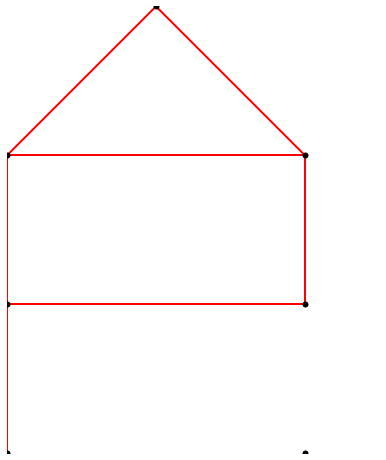

In [5]:
print directed_graph
directed_graph.view(image_view=False, render_axes=False, line_width=2);

## 3. PointTree

A Tree in Menpo is defined as a directed graph, thus `PointTree` is a subclass of `PointDirectedGraph`. The following tree:

```
               0
               |
            ___|___
           1       2
           |       |
          _|_      |
         3   4     5
         |   |     |
         |   |     |
         6   7     8
```
can be defined as:

In [6]:
points = np.array([[30, 30], [10, 20], [50, 20], [0, 10], [20, 10], [50, 10], [0, 0], [20, 0], [50, 0]])
adj_tree = csr_matrix(([1] * 8, ([0, 0, 1, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8])), shape=(9, 9))
tree = PointTree(points, adj_tree, root_vertex=0)

Tree of depth 3 with 9 vertices and 3 leaves.


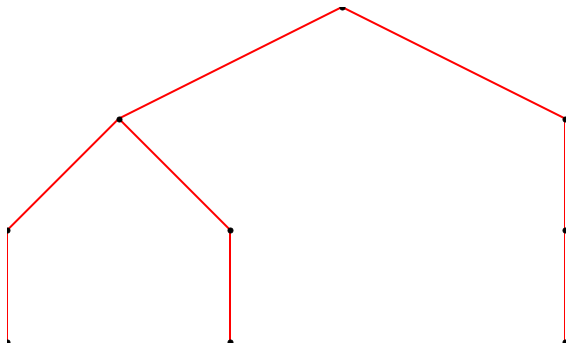

In [7]:
print tree
tree.view(image_view=False, render_axes=False, line_width=2);

## 4. Functionality

For the basic properties of graphs and trees, please refer to the `Graph` notebook. Herein, we present some more advanced functionality, such as shortest paths and minimum spanning tree.

#### Initialization from edges
All `PointGraph` subclasses are constructed using the adjacency matrix. However, it is possible to also create a graph (or tree) using the edges, i.e. a matrix of size `(n_edges, 2, )` that contains all the pairs of vertices that are connected with an edge. For example, the following undirected graph:
```
            0---|
                |
                |
        1       2
                |
                |
        3-------4


        5
```
can be defined as:

Undirected graph of 6 vertices (2 isolated) and 3 edges.


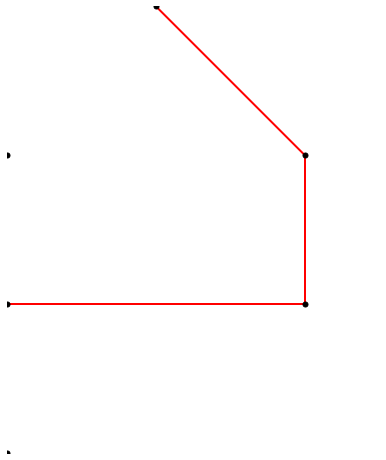

In [8]:
points = np.array([[10, 30], [0, 20], [20, 20], [0, 10], [20, 10], [0, 0]])
edges = [[0, 2], [2, 4], [3, 4]]
graph = PointUndirectedGraph.init_from_edges(points, edges)

print graph
graph.view(image_view=False, render_axes=False, line_width=2);

#### Paths
We can retrieve a path between two vertices (not the shortest one!) as:

In [9]:
v1 = 2
v2 = 5
print "The path between {} and {} in the undirected_graph is {}.".format(v1, v2, undirected_graph.find_path(v1, v2))
print "The path between {} and {} in the directed_graph is {}.".format(v1, v2, directed_graph.find_path(v1, v2))
print "The path between {} and {} in the tree is {}.".format(v1, v2, tree.find_path(v1, v2))

The path between 2 and 5 in the undirected_graph is [2, 1, 3, 5].
The path between 2 and 5 in the directed_graph is [2, 1, 3, 5].
The path between 2 and 5 in the tree is [2, 5].


Or get all the possible paths between two vertices:

In [10]:
v1 = 2
v2 = 4
print "Vertices {} and {} in the directed_graph " \
      "are connected with the following paths: {}.".format(v1, v2, directed_graph.find_all_paths(v1, v2))

Vertices 2 and 4 in the directed_graph are connected with the following paths: [[2, 1, 3, 4], [2, 4]].


The paths can be easily visualized as:

In [11]:
all_paths = directed_graph.find_all_paths(v1, v2)

paths = []
points = np.array([[10, 30], [0, 20], [20, 20], [0, 10], [20, 10], [0, 0], [20, 0]])
for path_list in all_paths:
    path = csr_matrix(([1] * len(path_list[:-1]), 
                       (path_list[:-1], path_list[1:])), shape=(7, 7))
    paths.append(PointDirectedGraph(points, path))

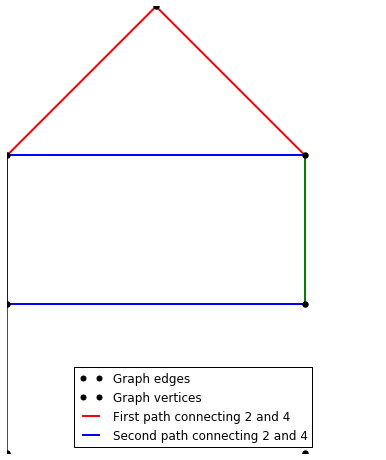

In [12]:
renderer = directed_graph.view(new_figure=True, image_view=False, line_width=2);
paths[0].view(figure_id=renderer.figure_id, image_view=False, line_colour='b', line_width=2, render_markers=False);
paths[1].view(figure_id=renderer.figure_id, image_view=False, render_axes=False, line_colour='g', line_width=2);

plt.legend(['Graph edges', 'Graph vertices', 'First path connecting 2 and 4', 'Second path connecting 2 and 4'], loc=8);

#### Shortest path
The previous functionality returns the first path that was found. One can retrieve the shortest path that connects two vertices as:

In [13]:
v1 = 2
v2 = 4
shortest_path, distance = directed_graph.find_shortest_path(v1, v2)
print "The shortest path connecting vertices {} and {} " \
      "in the directed_graph is {} and costs {}.".format(v1, v2, shortest_path, distance)

The shortest path connecting vertices 2 and 4 in the directed_graph is [2, 4] and costs 0.0.


Similarly:

In [14]:
v1 = 0
v2 = 4
shortest_path, distance = undirected_graph.find_shortest_path(v1, v2)
print "The shortest path connecting vertices {} and {} " \
      "in the undirected_graph is {} and costs {}.".format(v1, v2, shortest_path, distance)

The shortest path connecting vertices 0 and 4 in the undirected_graph is [0, 2, 4] and costs 1.0.


Of course there may be no path:

In [15]:
v1 = 0
v2 = 6
shortest_path, distance = directed_graph.find_shortest_path(v1, v2)
print "The shortest path connecting vertices {} and {} " \
      "in the directed_graph is {} and costs {}.".format(v1, v2, shortest_path, distance)

The shortest path connecting vertices 0 and 6 in the directed_graph is [] and costs inf.


#### Minimum spanning tree
Let us define the following _undirected_ graph with weights:

In [16]:
points = np.array([[0, 10], [10, 20], [20, 20], [30, 20], [40, 10], [30,  0], [20,  0], [10,  0], [20, 10]])
adj = csr_matrix(([4, 4, 8, 8, 8, 8, 11, 11, 7, 7, 4, 4, 2, 2, 9, 9, 14, 14, 10, 10, 2, 2, 1, 1, 6, 6, 7, 7], 
                  ([0, 1, 0, 7, 1, 2, 1, 7, 2, 3, 2, 5, 2, 8, 3, 4, 3, 5, 4, 5, 5, 6, 6, 7, 6, 8, 7, 8], 
                   [1, 0, 7, 0, 2, 1, 7, 1, 3, 2, 5, 2, 8, 2, 4, 3, 5, 3, 5, 4, 6, 5, 7, 6, 8, 6, 8, 7])), shape=(9, 9))

graph = PointUndirectedGraph(points, adj)

Undirected graph of 9 vertices and 14 edges.


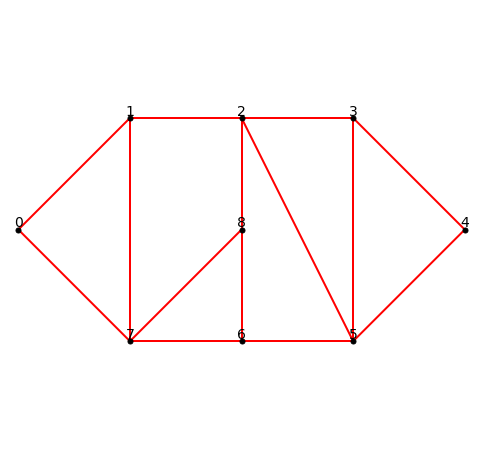

In [17]:
print graph
graph.view(image_view=False, render_axes=False, axes_x_limits=[-1, 41], axes_y_limits=[-10, 30], line_width=2);

# vertices numbering
for k, p in enumerate(graph.points):
    plt.gca().annotate(str(k), xy=(p[0], p[1]),
                       horizontalalignment='center',
                       verticalalignment='bottom',
                       fontsize=14)

The minimum spanning tree of the above graph is:

Tree of depth 5 with 9 vertices and 3 leaves.


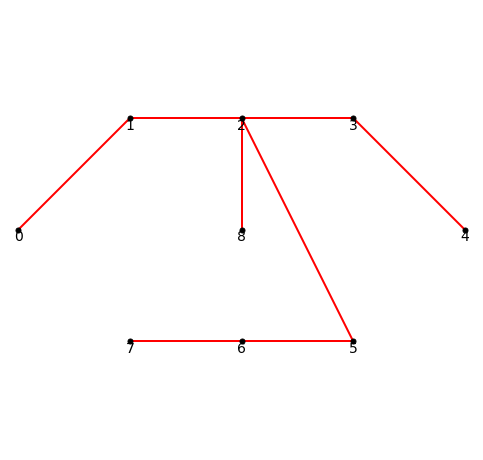

In [18]:
mst = graph.minimum_spanning_tree(root_vertex=0)

print mst
mst.view(image_view=False, render_axes=False, axes_x_limits=[-1, 41], axes_y_limits=[-10, 30], line_width=2);

# vertices numbering
for k, p in enumerate(mst.points):
    plt.gca().annotate(str(k), xy=(p[0], p[1]),
                       horizontalalignment='center',
                       verticalalignment='top',
                       fontsize=14)

#### Mask
All PointGraphs have a `from_mask` method that applies a mask on the graph's vertices. For example, let's remove vertices 2, 6 and 8 from the previous undirected graph:

Undirected graph of 6 vertices and 6 edges.


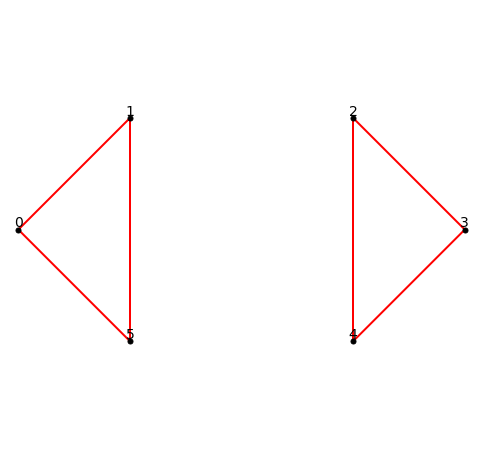

In [19]:
# Create mask that removes vertices 2, 6 and 8
mask = np.array([True, True, False, True, True, True, False, True, False])

# Mask the graph
masked_graph = graph.from_mask(mask)

# Visualize
print masked_graph
masked_graph.view(image_view=False, render_axes=False, axes_x_limits=[-1, 41], axes_y_limits=[-10, 30], line_width=2);

# vertices numbering
for k, p in enumerate(masked_graph.points):
    plt.gca().annotate(str(k), xy=(p[0], p[1]),
                       horizontalalignment='center',
                       verticalalignment='bottom',
                       fontsize=14)

## 5. Facial PointGraph

PointGraphs are useful when defining landmarks with different semantic groups. For example, let us load and visualize the `lenna` image that has landmarks in the `LJSON` format.

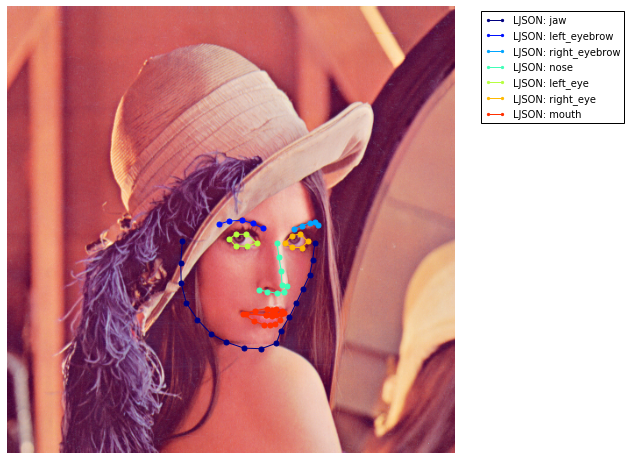

In [20]:
import menpo.io as mio

im = mio.import_builtin_asset.lenna_png()
im.view_landmarks(render_legend=True);

The landmarks are actually a `PointUndirectedGraph` that can be visualized as normal.

Undirected graph of 68 vertices and 63 edges.


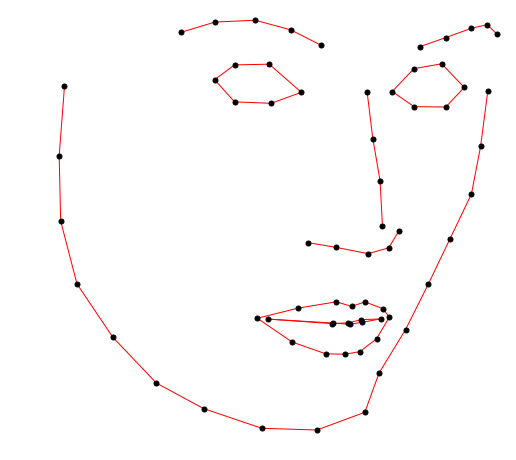

In [21]:
print im.landmarks['LJSON'].lms

im.landmarks['LJSON'].lms.view(render_axes=False);

And each one of the subgroups is a `PointUndirectedGraph`:

Undirected graph of 20 vertices and 20 edges.


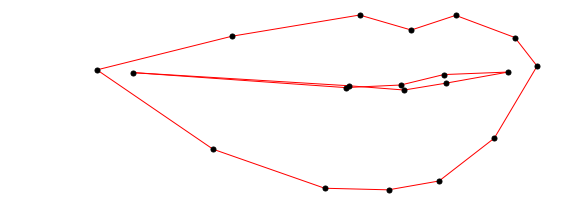

In [22]:
print im.landmarks['LJSON']['mouth']

im.landmarks['LJSON']['mouth'].view(render_axes=False);

## 6. Widget

All PointGraphs can be visualized using widgets. Note that Jupyter widget functionality is provided by the menpowidgets package and must be installed prior to using widgets (`conda install -c menpo menpowidgets`).

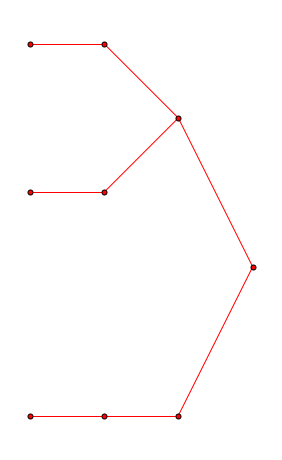

In [23]:
tree.view_widget()

This basically calls `visualize_pointclouds()` widget, which can accept a list of different PointGraphs. For example:

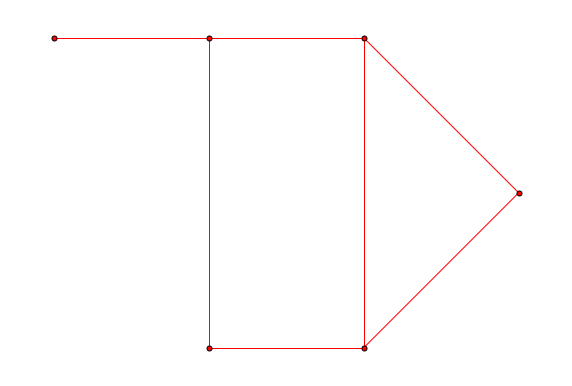

In [24]:
from menpowidgets import visualize_pointclouds

visualize_pointclouds([undirected_graph, directed_graph, tree, mst])